<a href="https://colab.research.google.com/github/sharmishtha2000/Quantum_Handwritten_Character_Recognition/blob/main/EMNIST_Mini_600_32layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 957 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 48.2 MB/s 
     |████████████████████████████████| 9.3 MB 24.0 MB/s 
     |████████████████████████████████| 108 kB 64.5 MB/s 


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
n_epochs = 20
n_layers = 8
n_train =2500
n_test = 1000

SAVE_PATH = "/content/gdrive/My Drive/QIP/emnist/quanvolution_train_mini_layer32/"
PREPROCESS = True
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:

train = pd.read_csv('/content/gdrive/My Drive/QIP/emnist/emnist-letters-train.csv')


In [ ]:
print('training dataset dimensions: ', train.shape)


training dataset dimensions:  (88799, 785)


In [ ]:
columns = ['labels']
for i in range(train.shape[1]-1):
    columns.append(i)

train.columns = columns
print("col", columns)
classes = sorted(train['labels'].unique())
print('number of classes: ', len(classes))
print("classes", classes)

col ['labels', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train.drop(['labels'], axis=1),
                                                  train.labels - 1,
                                                  train_size=600,
                                                  test_size=150,
                                                  random_state=0,
                                                  stratify=train.labels - 1)

x_train = x_train / 255.0
x_val = x_val / 255.0

x_train = x_train.values.reshape(x_train.shape[0],28, 28, 1).astype('float32')
x_val = x_val.values.reshape(x_val.shape[0],28, 28, 1).astype('float32')

print('trianing set: ', x_train.shape, y_train.shape)
print('validation set: ', x_val.shape, y_val.shape)
type(x_train)

trianing set:  (600, 28, 28, 1) (600,)
validation set:  (150, 28, 28, 1) (150,)


numpy.ndarray

In [ ]:
# dev = qml.device('qiskit.ibmq', wires=4, backend='ibmq_qasm_simulator', ibmqx_token="1d30263a2656825b899d953e66f24560a5805c19db74fbcf942161ccdb5ecc066fb7438e77eed4e1bb8665d5e71d2c38b56547f52338fa7c9236b65318079977")
# dev.capabilities()['backend']
#dev = qml.device("qiskit.aer", wires=4)
dev = qml.device("default.qubit", wires=4)

rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    for j in range(4):
        qml.RX(np.pi * phi[j], wires=j)

    RandomLayers(rand_params, wires=list(range(4)))

    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

In [ ]:
print(rand_params)

[[3.44829694 4.49366732 3.78727399 3.42360201]
 [2.66190161 4.0582724  2.74944154 5.60317502]
 [6.0548717  2.40923412 4.97455513 3.32314479]
 [3.56912924 5.8156952  0.44633272 0.54744954]
 [0.12703594 5.23150478 4.88930306 5.46644755]
 [6.14884039 5.02126135 2.89956035 4.90420945]
 [0.74314013 4.02074236 0.90071527 5.93552986]
 [3.27886971 2.60539781 1.66225193 4.86465374]]


In [ ]:
drawer = qml.draw(circuit, show_all_wires=True)
print(drawer(rand_params[0]))

0: ──RX(10.83)─╭RandomLayers(M0)─┤  <Z>
1: ──RX(14.12)─├RandomLayers(M0)─┤  <Z>
2: ──RX(11.90)─├RandomLayers(M0)─┤  <Z>
3: ──RX(10.76)─╰RandomLayers(M0)─┤  <Z>


In [ ]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, 4))

    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

In [ ]:
if PREPROCESS == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(x_train):
        print(idx + 1, "/", x_train.shape[0])
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)
    np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(x_val):
        print(idx + 1, "/", x_val.shape[0])
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "q_test_images.npy", q_test_images)


# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

Quantum pre-processing of train images:
1 / 600
2 / 600
3 / 600
4 / 600
5 / 600
6 / 600
7 / 600
8 / 600
9 / 600
10 / 600
11 / 600
12 / 600
13 / 600
14 / 600
15 / 600
16 / 600
17 / 600
18 / 600
19 / 600
20 / 600
21 / 600
22 / 600
23 / 600
24 / 600
25 / 600
26 / 600
27 / 600
28 / 600
29 / 600
30 / 600
31 / 600
32 / 600
33 / 600
34 / 600
35 / 600
36 / 600
37 / 600
38 / 600
39 / 600
40 / 600
41 / 600
42 / 600
43 / 600
44 / 600
45 / 600
46 / 600
47 / 600
48 / 600
49 / 600
50 / 600
51 / 600
52 / 600
53 / 600
54 / 600
55 / 600
56 / 600
57 / 600
58 / 600
59 / 600
60 / 600
61 / 600
62 / 600
63 / 600
64 / 600
65 / 600
66 / 600
67 / 600
68 / 600
69 / 600
70 / 600
71 / 600
72 / 600
73 / 600
74 / 600
75 / 600
76 / 600
77 / 600
78 / 600
79 / 600
80 / 600
81 / 600
82 / 600
83 / 600
84 / 600
85 / 600
86 / 600
87 / 600
88 / 600
89 / 600
90 / 600
91 / 600
92 / 600
93 / 600
94 / 600
95 / 600
96 / 600
97 / 600
98 / 600
99 / 600
100 / 600
101 / 600
102 / 600
103 / 600
104 / 600
105 / 600
106 / 600
107 / 60

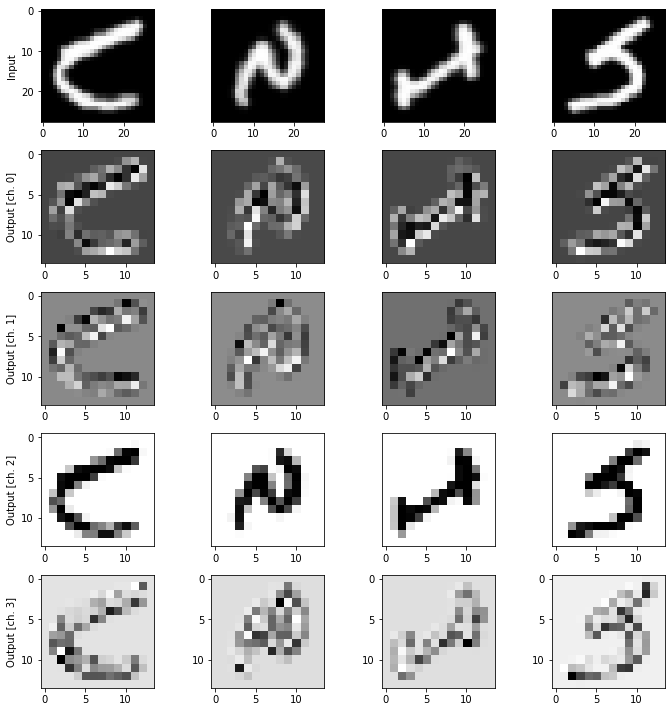

In [ ]:
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(x_train[k, :, :, 0], cmap="gray")
    #plt.title(np.argmax(y_predict))

    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()


In [ ]:
q_train_images.shape

(600, 14, 14, 4)

In [ ]:
from keras import regularizers
from keras import backend as K

def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Conv2D(32,2,input_shape=(14,14,4)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        #keras.layers.Dense(784, activation ="relu", kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.L2(0.0005),),
        #keras.layers.Dense(500, activation ="relu", kernel_regularizer=regularizers.l2(0.00005)),
        keras.layers.Dense(250, activation="relu", kernel_regularizer=regularizers.l2(0.000001), bias_regularizer=regularizers.L2(0.00005)),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(120, activation="relu", kernel_regularizer=regularizers.l2(0.000001), bias_regularizer=regularizers.L2(0.00005)),
        keras.layers.Dropout(0.25),
        #keras.layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.00005)),
        keras.layers.Dense(26, activation="softmax")

    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    K.set_value(model.optimizer.learning_rate, 0.0005)
    return model

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=8,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=8,factor=0.2,min_lr=0.001)

In [ ]:

q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    y_train,
    validation_data=(q_test_images, y_val),
    epochs=60,
    verbose=2,
    callbacks=[MCP,ES,RLP]
)

q_model.summary()

Epoch 1/60

Epoch 1: val_accuracy improved from -inf to 0.23333, saving model to Best_points.h5
19/19 - 1s - loss: 3.2498 - accuracy: 0.0567 - val_loss: 3.1774 - val_accuracy: 0.2333 - lr: 5.0000e-04 - 1s/epoch - 53ms/step
Epoch 2/60

Epoch 2: val_accuracy improved from 0.23333 to 0.29333, saving model to Best_points.h5
19/19 - 0s - loss: 3.1373 - accuracy: 0.1350 - val_loss: 3.0569 - val_accuracy: 0.2933 - lr: 5.0000e-04 - 264ms/epoch - 14ms/step
Epoch 3/60

Epoch 3: val_accuracy improved from 0.29333 to 0.32667, saving model to Best_points.h5
19/19 - 0s - loss: 2.9836 - accuracy: 0.2300 - val_loss: 2.8643 - val_accuracy: 0.3267 - lr: 5.0000e-04 - 246ms/epoch - 13ms/step
Epoch 4/60

Epoch 4: val_accuracy improved from 0.32667 to 0.40000, saving model to Best_points.h5
19/19 - 0s - loss: 2.7621 - accuracy: 0.2717 - val_loss: 2.5988 - val_accuracy: 0.4000 - lr: 5.0000e-04 - 270ms/epoch - 14ms/step
Epoch 5/60

Epoch 5: val_accuracy improved from 0.40000 to 0.47333, saving model to Best_p

In [ ]:
q_model.save(SAVE_PATH + "q_model")

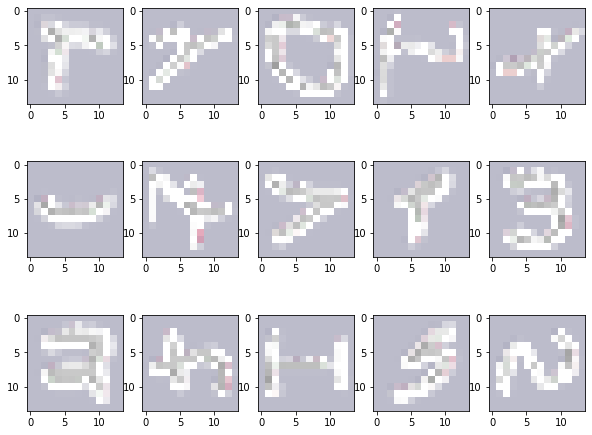

In [ ]:
import matplotlib.pyplot as plt 
import warnings
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(q_test_images[i], cmap="gray")


In [ ]:
axes[0, 1].imshow(x_train[1, :, :, 0], cmap="gray")
plt.show()

In [ ]:
labels_dict ={1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'H',9:'I',10:'J',11:'K',12:'L',13:'M',14:'N',15:'O',16:'P',17:'Q',18:'R',19:'S',20:'T',21:'U',22:'V',23:'W',24:'X',25:'Y',26:'Z'}

In [ ]:
def predictShow(i):
  prediction=q_model.predict(q_test_images[i:i+1])
  y_predict=(prediction>0.5)
  plt.imshow(q_train_images[i],cmap="gray")
  plt.title(labels_dict[np.argmax(y_predict)])
  plt.show()

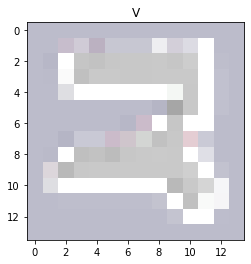

In [ ]:
predictShow(34)

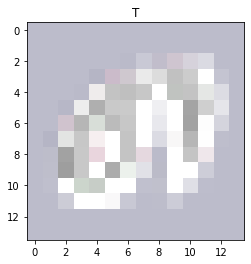

In [ ]:
predictShow(10)

KeyError: ignored

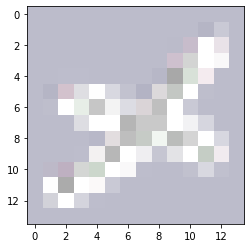

In [ ]:
predictShow(110)

In [ ]:
def plotgraph(epochs, acc, val_acc, type):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model ' + type)
    plt.ylabel(type)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
acc = q_history.history['accuracy']
val_acc = q_history.history['val_accuracy']
loss = q_history.history['loss']
val_loss = q_history.history['val_loss']
epochs = range(1,len(acc)+1)

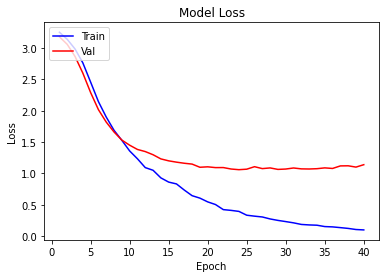

In [ ]:
plotgraph(epochs, loss, val_loss, 'Loss')

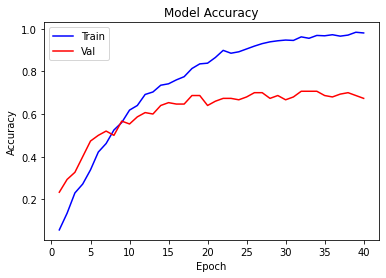

In [ ]:
plotgraph(epochs, acc, val_acc, 'Accuracy')

In [ ]:
from keras import regularizers
from keras import backend as K

def MyModel_classical():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Conv2D(32,2,input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        #keras.layers.Dense(784, activation ="relu", kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.L2(0.0005),),
        #keras.layers.Dense(500, activation ="relu", kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(250, activation="relu", kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.L2(0.00005)),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(120, activation="relu", kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.L2(0.00005)),
        keras.layers.Dropout(0.25),
        #keras.layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
        keras.layers.Dense(26, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    K.set_value(model.optimizer.learning_rate, 0.0001)
    return model

In [ ]:
c_model = MyModel_classical()

c_history = c_model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=40,
    verbose=2,
    #callbacks=[MCP,ES,RLP]
)

c_model.summary()

Epoch 1/40
19/19 - 2s - loss: 3.3039 - accuracy: 0.0633 - val_loss: 3.2548 - val_accuracy: 0.0800 - 2s/epoch - 130ms/step
Epoch 2/40
19/19 - 1s - loss: 3.2098 - accuracy: 0.1267 - val_loss: 3.1659 - val_accuracy: 0.1400 - 623ms/epoch - 33ms/step
Epoch 3/40
19/19 - 1s - loss: 3.0918 - accuracy: 0.1767 - val_loss: 3.0554 - val_accuracy: 0.2000 - 630ms/epoch - 33ms/step
Epoch 4/40
19/19 - 1s - loss: 2.9729 - accuracy: 0.2333 - val_loss: 2.9340 - val_accuracy: 0.2400 - 626ms/epoch - 33ms/step
Epoch 5/40
19/19 - 1s - loss: 2.8169 - accuracy: 0.2850 - val_loss: 2.8026 - val_accuracy: 0.2733 - 662ms/epoch - 35ms/step
Epoch 6/40
19/19 - 1s - loss: 2.6852 - accuracy: 0.3217 - val_loss: 2.6717 - val_accuracy: 0.3133 - 643ms/epoch - 34ms/step
Epoch 7/40
19/19 - 1s - loss: 2.5284 - accuracy: 0.3833 - val_loss: 2.5427 - val_accuracy: 0.3800 - 632ms/epoch - 33ms/step
Epoch 8/40
19/19 - 1s - loss: 2.3828 - accuracy: 0.4250 - val_loss: 2.4188 - val_accuracy: 0.3667 - 647ms/epoch - 34ms/step
Epoch 9/40

In [ ]:
c_model.save(SAVE_PATH + "c_model")

In [ ]:
prediction = c_model.predict(x_train[:1])
classes_x=np.argmax(prediction,axis=1)
print(classes_x)

[13]


In [ ]:
c_acc = c_history.history['accuracy']
c_val_acc = c_history.history['val_accuracy']
c_loss = c_history.history['loss']
c_val_loss = c_history.history['val_loss']
epochs = range(1,len(c_acc)+1)

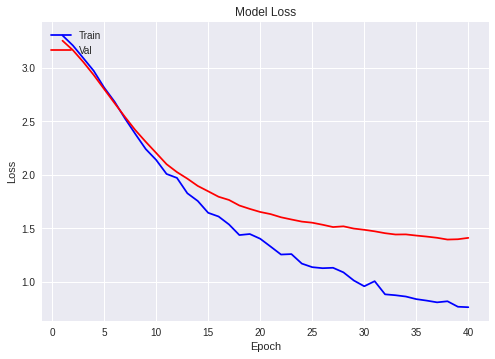

In [ ]:
plotgraph(epochs, c_loss, c_val_loss, "Loss")

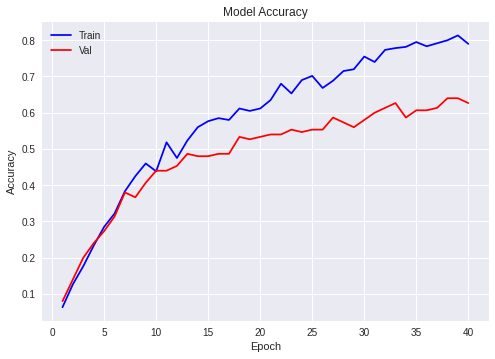

In [ ]:
plotgraph(epochs, c_acc, c_val_acc, "Accuracy")

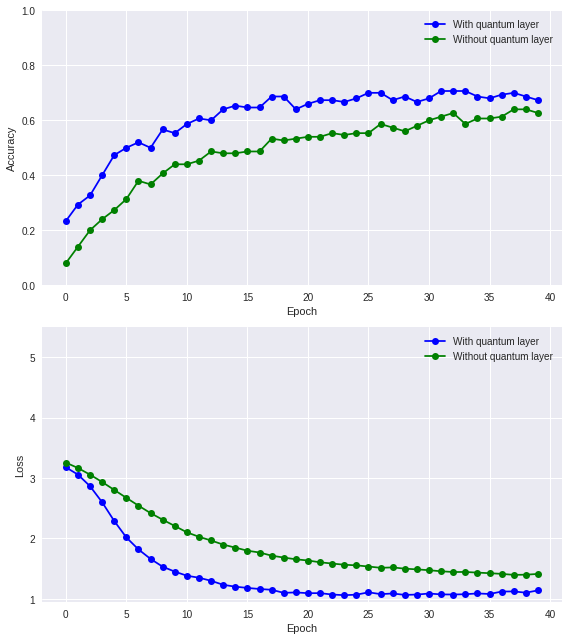

accuracy difference: 0.04666668176651001
loss difference: 0.2723027467727661


In [ ]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9))

ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=5.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()
print("accuracy difference:", q_history.history["val_accuracy"][-1] - c_history.history["val_accuracy"][-1])
print("loss difference:", c_history.history["val_loss"][-1] - q_history.history["val_loss"][-1])

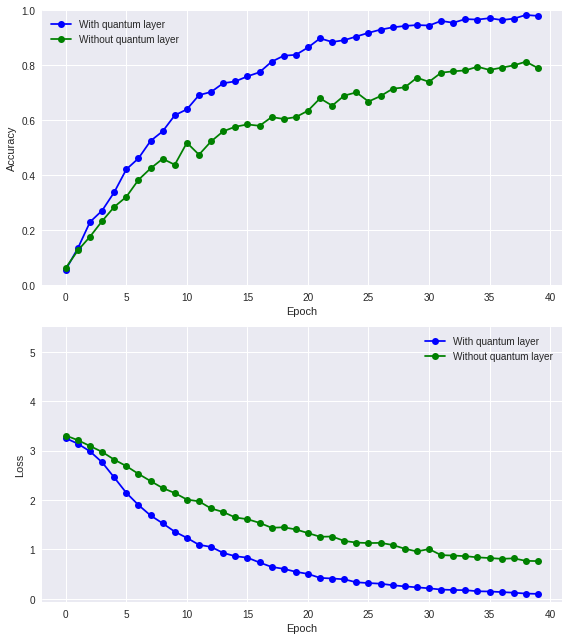

accuracy difference: 0.1899999976158142
loss difference: 0.6635864302515984


In [ ]:
plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9))

ax1.plot(q_history.history["accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=5.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()
print("accuracy difference:", q_history.history["accuracy"][-1] - c_history.history["accuracy"][-1])
print("loss difference:", c_history.history["loss"][-1] - q_history.history["loss"][-1])